In [46]:
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import utils

In [2]:
# average June-July-August NAO and precipitation from NCEP (since 1950)
data_jja = xr.open_dataset("nao_tp_jja.nc")

In [4]:
data_jja

<xarray.Dataset>
Dimensions:  (year: 70, lat: 94, lon: 192)
Coordinates:
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2015 2016 2017 2018 2019
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Data variables:
    tp       (year, lat, lon) float32 ...
    NAO      (year) float64 ...

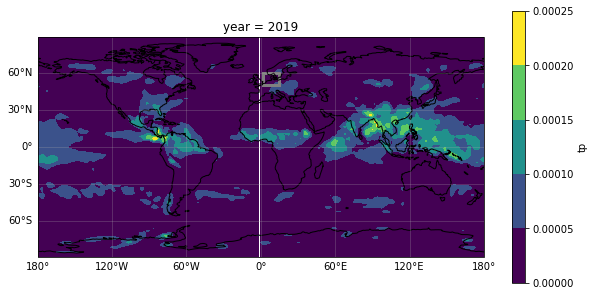

In [3]:
p = utils.plot_dataarray_map(data_jja.sel(year=2019).tp)
utils.add_box('dk', p.axes, color="gray")
plt.show()

In [55]:
#select an area of jja data

area1 = xr.concat((data_jja.sel(lon = slice(280,360), lat = slice(90,20)),data_jja.sel(lon = slice(360,50), lat = slice(90,20))),dim='lon')
area1_precip_mean = area1.tp.mean(dim='year')

Text(0.5, 1.0, 'Multi Year Total Precipitation Mean')

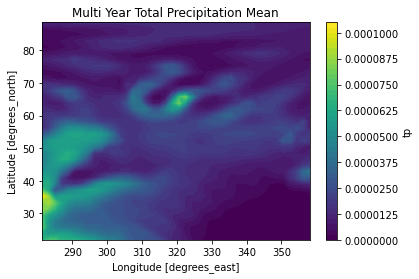

In [56]:
area1_precip_mean.plot.contourf(levels=50)
plt.title('Multi Year Total Precipitation Mean')

**Calculate correlation between NAO and TP in Northern Atlantic/Europe Region**

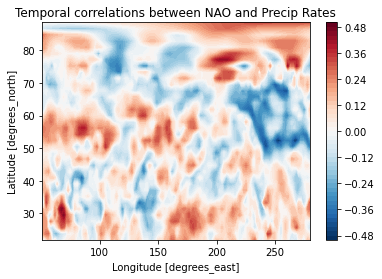

In [33]:
xr.corr(area1.NAO, area1.tp, dim = 'year').plot.contourf(levels=50)
plt.title('Temporal correlations between NAO and Precip Rates')
plt.show()

**Gridbox averages for Denmark and Mediterranian Precipitation**

In [93]:
dk = data_jja.sel(lat = slice(60, 50), lon = slice(2,15))
med = data_jja.sel(lat = slice(41, 36), lon = slice(10,30))
dk_tp_gbmean = dk.tp.mean(dim=('lat','lon'))
med_tp_gbmean = med.tp.mean(dim=('lat','lon'))

In [94]:
#detrend and standardize

dk_tp_gbmean_detrend = xr.apply_ufunc(scipy.signal.detrend , dk_tp_gbmean)
med_tp_gbmean_detrend = xr.apply_ufunc(scipy.signal.detrend , med_tp_gbmean)

dk_tp_gbmean_stdzd = (dk_tp_gbmean_detrend  - dk_tp_gbmean_detrend.mean()) / dk_tp_gbmean_detrend.std()
med_tp_gbmean_stdzd = (med_tp_gbmean_detrend  - med_tp_gbmean_detrend.mean()) / med_tp_gbmean_detrend.std()

**Correlation Relations**

In [96]:
#grid box mean precip correlation between dk and med
print('grid box mean precip correlation between dk and med')
print(xr.corr(dk_tp_gbmean_stdzd, med_tp_gbmean_stdzd).values)

#grid box mean precip correlated with NAO
print('grid box mean precip DK correlated with NAO')
print(xr.corr(dk_tp_gbmean_stdzd, dk.NAO).values)
print('grid box mean precip MED correlated with NAO')
print(xr.corr(med_tp_gbmean_stdzd, med.NAO).values)

#add one NAO.std() to NAO. Which area's correlation is affected more?
#when standardized the correlation coeff equals the slope, so DK would be affected more, as the abs(corr coeff) is higher

grid box mean precip correlation between dk and med
-0.25744708554970086
grid box mean precip DK correlated with NAO
-0.5762253538330392
grid box mean precip MED correlated with NAO
0.4069180445386415


In [86]:
med.NAO.std().values

array(0.78889528)

In [88]:
dk.NAO

<xarray.DataArray 'NAO' (year: 70)>
array([-0.39    , -0.123333, -0.216667,  0.266667, -1.026667,  0.743333,
       -0.733333, -0.803333, -1.633333,  0.476667, -0.483333,  0.613333,
       -0.636667, -0.606667,  0.376667,  0.466667, -0.223333,  1.296667,
       -0.366667, -0.176667,  0.666667,  0.286667,  0.99    ,  0.366667,
       -0.503333,  0.19    ,  1.053333, -0.393333,  0.43    ,  1.296667,
       -1.156667,  0.103333,  0.016667,  1.493333,  0.396667,  0.003333,
        0.053333, -0.723333,  0.266667,  0.306667,  0.656667,  0.16    ,
        0.556667, -1.133333,  1.18    ,  0.336667,  0.92    ,  0.046667,
       -1.013333,  0.316667, -0.406667, -0.11    ,  0.566667,  0.06    ,
       -0.056667,  0.043333, -0.09    , -0.623333, -1.316667, -1.13    ,
       -0.866667, -1.436667, -1.643333,  0.883333, -0.913333, -1.333333,
       -1.363333,  0.033333,  1.743333, -1.266667])
Coordinates:
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2015 2016 2017 2018 2019